In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishnukarande","key":"95c389e7e296c20a0f21b0472b1be6ff"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification

 97% 705M/723M [00:05<00:00, 172MB/s]
100% 723M/723M [00:05<00:00, 131MB/s]


In [ ]:
!unzip jigsaw-unintended-bias-in-toxicity-classification.zip

Archive:  jigsaw-unintended-bias-in-toxicity-classification.zip
  inflating: all_data.csv            
  inflating: identity_individual_annotations.csv  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: test_private_expanded.csv  
  inflating: test_public_expanded.csv  
  inflating: toxicity_individual_annotations.csv  
  inflating: train.csv               


In [ ]:
Data=pd.read_csv("/content/train.csv")

In [ ]:
Data.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

**dataset contain 45 columns, out of 45 the 25 columns we are going to use as subgroup , 7 columns are targets which we dont have to predict as part of this competation. 1 colums (target) which contain toxicity score between 0-1.**

In [ ]:
Data.isnull().sum()

In [ ]:
print('number of null values in comment_text :' ,Data['comment_text'].isnull().sum(axis = 0))
print('number of null values in target :',Data['target'].isnull().sum(axis = 0))

number of null values in comment_text : 0
number of null values in target : 0


In [ ]:
Data['target'].unique()

array([0.        , 0.89361702, 0.66666667, ..., 0.87726476, 0.01116838,
       0.87008821])

In [ ]:
Data['class']=Data['target'].apply(lambda x:'non-toxic' if x<0.5 else 'toxic')

In [ ]:
Data.head(2)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,class
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,non-toxic
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,non-toxic


In [ ]:
Data['class'].unique()

array(['non-toxic', 'toxic'], dtype=object)

as target data is in flot64(which is probability values), we have to convert them into 0 and 1 ,
0 ==> Toxic
1 ==> Non Toxic

In [ ]:
#Diatribution of target values

In [ ]:
import numpy as np

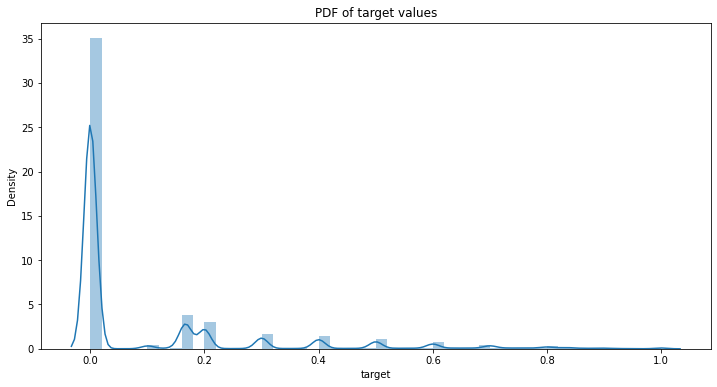

In [ ]:
import seaborn as sns, numpy as np
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.distplot(Data['target'],ax=ax).set(title='PDF of target values')

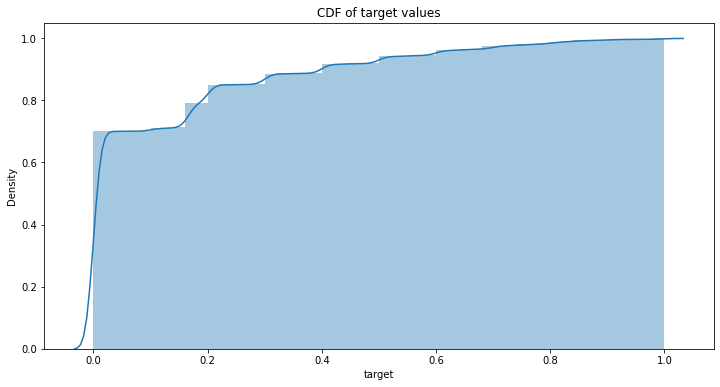

In [ ]:
# https://stackoverflow.com/questions/39297523/plot-cdf-cumulative-histogram-using-seaborn-python
kwargs = {'cumulative': True}
# sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.distplot(Data['target'],ax=ax,hist_kws=kwargs, kde_kws=kwargs).set(title='CDF of target values')


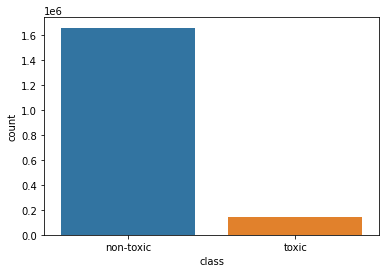

In [ ]:
sns.countplot(Data['class'])

In [ ]:
# # https://plotly.com/python/histograms/
#import plotly.express as px
#fig = px.histogram(Data, x="class")
#fig.show()

Observation:
 Data is imbalance
```



In [ ]:
#Toxic comment
for i in Data[['comment_text','target','class']][Data['class']=='toxic'][:5].values:
  print("Comment :\n" ,i[0])
  print("-"*20)
  print('target:', i[1])
  print('-'*10)
  print('class :', i[2])
  print("*"*50, '\n')

Comment :
 haha you guys are a bunch of losers.
--------------------
target: 0.8936170212765957
----------
class : toxic
************************************************** 

Comment :
 ur a sh*tty comment.
--------------------
target: 0.6666666666666666
----------
class : toxic
************************************************** 

Comment :
 It's ridiculous that these guys are being called "protesters". Being armed is a threat of violence, which makes them terrorists.
--------------------
target: 0.6
----------
class : toxic
************************************************** 

Comment :
 This story gets more ridiculous by the hour! And, I love that people are sending these guys dildos in the mail now. But… if they really think there's a happy ending in this for any of them, I think they're even more deluded than all of the jokes about them assume.
--------------------
target: 0.5
----------
class : toxic
************************************************** 

Comment :
 Angry trolls, misog

In [ ]:
#Non Toxic comment
for i in Data[['comment_text','target','class']][Data['class']=='non-toxic'][:5].values:
    print('Comment :\n' ,i[0])
    print('='*20)
    print('target :' ,i[1])
    print('='*20)
    print('class :' ,i[2])
    print('*'*100,'\n')

Comment :
 This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!
target : 0.0
class : non-toxic
**************************************************************************************************** 

Comment :
 Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!
target : 0.0
class : non-toxic
**************************************************************************************************** 

Comment :
 This is such an urgent design problem; kudos to you for taking it on. Very impressive!
target : 0.0
class : non-toxic
**************************************************************************************************** 

Comment :
 Is this something I'll be able to install on my site? When will you be releasing it?
target : 0.0
class : non-toxic
**************************************************************************************************** 

Comment :
 hahahahahahahahhha s

###  Checking Number Of Nan Values in all sungroup

In [ ]:
miss_val_train_df = Data.isnull().sum(axis=0) / len(Data)

In [ ]:
miss_val_train_df

In [ ]:
new_data = Data[[ 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white']]

In [ ]:
Nan_values_percentage = new_data.isnull().sum(axis=0) / len(Data) *100

In [ ]:
Nan_values_percentage

asian                                  77.553558
atheist                                77.553558
bisexual                               77.553558
black                                  77.553558
buddhist                               77.553558
christian                              77.553558
female                                 77.553558
heterosexual                           77.553558
hindu                                  77.553558
homosexual_gay_or_lesbian              77.553558
intellectual_or_learning_disability    77.553558
jewish                                 77.553558
latino                                 77.553558
male                                   77.553558
muslim                                 77.553558
other_disability                       77.553558
other_gender                           77.553558
other_race_or_ethnicity                77.553558
other_religion                         77.553558
other_sexual_orientation               77.553558
physical_disability 

**#Observation:**
In all subgroup there are 77.55 % comment having NAN values.


In [ ]:
##Deal With Nan Values

In [ ]:
new_data = Data[[ 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white','class']]

In [ ]:
new_data['asian'] = new_data['asian'].fillna(0)
new_data['asian'] = new_data['asian'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['atheist'] = new_data['atheist'].fillna(0)
new_data['atheist'] = new_data['atheist'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['bisexual'] = new_data['bisexual'].fillna(0)
new_data['bisexual'] = new_data['bisexual'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['black'] = new_data['black'].fillna(0)
new_data['black'] = new_data['black'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['buddhist'] = new_data['buddhist'].fillna(0)
new_data['buddhist'] = new_data['buddhist'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['christian'] = new_data['christian'].fillna(0)
new_data['christian'] = new_data['christian'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['female'] = new_data['female'].fillna(0)
new_data['female'] = new_data['female'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['heterosexual'] = new_data['heterosexual'].fillna(0)
new_data['heterosexual'] = new_data['heterosexual'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['hindu'] = new_data['hindu'].fillna(0)
new_data['hindu'] = new_data['hindu'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['homosexual_gay_or_lesbian'] = new_data['homosexual_gay_or_lesbian'].fillna(0)
new_data['homosexual_gay_or_lesbian'] = new_data['homosexual_gay_or_lesbian'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['intellectual_or_learning_disability'] = new_data['intellectual_or_learning_disability'].fillna(0)
new_data['intellectual_or_learning_disability'] = new_data['intellectual_or_learning_disability'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['jewish'] = new_data['jewish'].fillna(0)
new_data['jewish'] = new_data['jewish'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['latino'] = new_data['latino'].fillna(0)
new_data['latino'] = new_data['latino'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['male'] = new_data['male'].fillna(0)
new_data['male'] = new_data['male'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['muslim'] = new_data['muslim'].fillna(0)
new_data['muslim'] = new_data['muslim'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['other_disability'] = new_data['other_disability'].fillna(0)
new_data['other_disability'] = new_data['other_disability'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['other_gender'] = new_data['other_gender'].fillna(0)
new_data['other_gender'] = new_data['other_gender'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['other_race_or_ethnicity'] = new_data['other_race_or_ethnicity'].fillna(0)
new_data['other_race_or_ethnicity'] = new_data['other_race_or_ethnicity'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['other_religion'] = new_data['other_religion'].fillna(0)
new_data['other_religion'] = new_data['other_religion'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['other_sexual_orientation'] = new_data['other_sexual_orientation'].fillna(0)
new_data['other_sexual_orientation'] = new_data['other_sexual_orientation'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['physical_disability'] = new_data['physical_disability'].fillna(0)
new_data['physical_disability'] = new_data['physical_disability'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['psychiatric_or_mental_illness'] = new_data['psychiatric_or_mental_illness'].fillna(0)
new_data['psychiatric_or_mental_illness'] = new_data['psychiatric_or_mental_illness'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['transgender'] = new_data['transgender'].fillna(0)
new_data['transgender'] = new_data['transgender'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['white'] = new_data['white'].fillna(0)
new_data['white'] = new_data['white'].apply(lambda x: 0 if x < 0.5 else 1)

In [ ]:
new_data.head()

,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,...,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,non-toxic
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,non-toxic
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,non-toxic
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,non-toxic
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,toxic


##Lats focus on comment_text column

In [ ]:
Data['num_words'] = [len(sent.split()) for sent in Data['comment_text']]

In [ ]:
Data[['comment_text', 'num_words','class']].head()

,comment_text,num_words,class
0,"This is so cool. It's like, 'would you want yo...",19,non-toxic
1,Thank you!! This would make my life a lot less...,22,non-toxic
2,This is such an urgent design problem; kudos t...,16,non-toxic
3,Is this something I'll be able to install on m...,17,non-toxic
4,haha you guys are a bunch of losers.,8,toxic


In [ ]:
toxic = Data['num_words'][Data['class']=='toxic']
Non_toxic = Data['num_words'][Data['class']=='non-toxic']

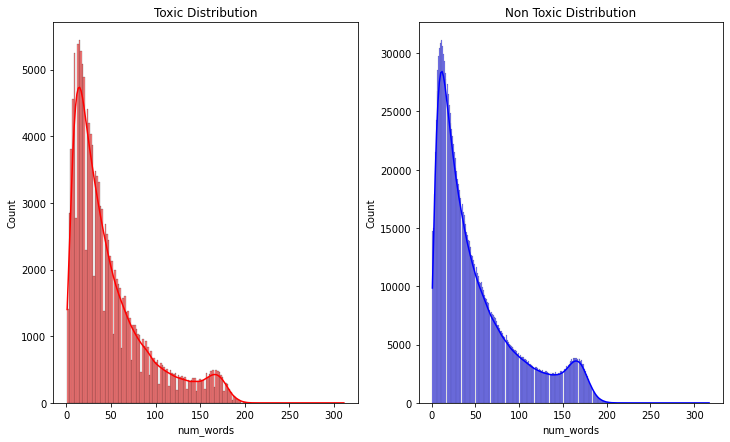

In [ ]:
import matplotlib.pyplot as plt     
import seaborn as sns
fig, ax = plt.subplots(1,2,figsize=(12,7))
sns.histplot(toxic, kde= True, ax=ax[0], color= 'r')
sns.histplot(Non_toxic, kde= True, ax=ax[1], color= 'b')
ax[0].set_title("Toxic Distribution")
ax[1].set_title("Non Toxic Distribution")
plt.show();

Overall Observation:
90 percentile of the comment having length<=65
we can see that both having follow same distribution and overlap on each other, not find much information not much useful.
the new feature we made is not so useful.